In [3]:
import torch
import os
import random
import numpy as np
import csv
import math
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Get training and test data, check them, check normalisation
### Train and val data are coming from old dataset from Olga, relaxed posem 40 patients in total, but we remove ET patients


In [ ]:
pat2id = {'Черк0208.txt':0, 'Керш0203.txt':1, 'Аста0201.txt':2, 'Лега0204.txt':3, 'Хвал0207.txt':4, 'Дюки0202.txt':5, 'Сидо0205.txt':6, 'Фрол0206.txt':7,
         'Шелу0209.txt':8, 'Сави0208.txt':9, 'Наза0205.txt':10, 'Колг0203.txt':11, 'Савв0207.txt':12, 'Медв0204.txt':13, 'Кова0202.txt':14, 'Ерми0201.txt':15, 'Погр0206.txt':16,
          'Голу0203.txt':17, 'Ротм0208.txt':18, 'Хлюс02011.txt':19, 'Грек0204.txt':20, 'Губа0205.txt':21, 'Серо0209.txt':22, 'Гава0202.txt':23, 'Бело0201.txt':24, 'Пана0207.txt':25, 'Соло02010.txt':26, 'Павл0206.txt':27,
         'Молю02010.txt':28, 'Тихо02013.txt':29, 'Муха02011.txt':30, 'Кудр0203.txt':31, 'Соко02012.txt':32, 'Ершо0202.txt':33, 'Купр0204 .txt':34, 'Куту0205.txt':35, 'Луче0207.txt':36, 'Даке0201.txt':37, 'Лити0206.txt':38, 
          'Макс0208.txt':39, 'Миро0209.txt':40, 'Хром0205.txt':41, 'Зими0202.txt':42,'Манс0203.txt':43, 'Тима0204.txt':44, 'Гриб02012.txt':45, 'Само0204.txt':46, 'Бага0201.txt':47, 'Дени0202.txt':48, 'Лисов0203.txt':49, 
          'Семе0202.txt':50, 'Наум0201.txt':51}

In [29]:
data_path = 'C:/Users/khokhlovam/Documents/kotelnikov/data/data_lstm_test_complet.csv'
df =pd.read_csv(data_path, header=None, names=range(1564)) # 
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563
0,control,4,freq,17.400000,11.200000,30.500000,19.200000,8.800000,22.900000,6.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,control,4,flash,1.009200,1.523200,0.793000,1.152000,1.337600,1.007600,1.007400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,control,4,bandwidth,7.700000,3.600000,19.000000,7.000000,2.600000,10.700000,3.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,control,4,timeSignal,0.098000,0.238000,0.256000,0.528000,0.536000,0.802000,0.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,control,4,time_sincelast,0.098000,0.140000,0.018000,0.272000,0.008000,0.266000,0.048000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,control,4,ampl,115.189682,181.916809,107.035546,113.025248,204.781645,459.905485,206.880764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,control,4,duratSec,0.058000,0.136000,0.026000,0.060000,0.152000,0.044000,0.146000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,control,4,frac,0.442529,0.321429,0.622951,0.364583,0.295455,0.467249,0.565217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,control,4,phase,-0.176576,1.975381,-0.215273,0.658635,0.088833,-0.061623,-2.434454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,control,6,freq,36.800000,19.200000,26.400000,15.800000,22.000000,21.100000,10.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вот расшифровка для характеристик

In [ ]:
 feat_dictionary = {'freq':freq_signal_ordered, 'flash':Flash_Durat_signal_ordered, 'bandwidth':BandwidthesHz_signal_ordered,
                       'timeSignal':timeSignal_ordered, 'time_sincelast':timeSignal_for_lstm, "ampl":Ampl_ordered,
                        'duratSec':DuratSeconds_ordered, 'frac':Frac_Band_ordered, 'phase':Phase_ordered }

## Patent features
Из патента следуюет, что используются 3 признака:

Центральная частота -Fr,q
Длительность на полувысоте - DuratPeri (Flash), ds
Ширина полосы частот на полувысоте - BandwidthesHz

## All features that we have
Previously, sclassification tests with trees using the train setwith mean value have shows that the following  characteristics were important. Let's start adding them in the same or
d
* Amplitude (ampl): 0,1832
* Total Wawetrains (n/a): 0,148
* time when wawetrain appeared (timeSingal): 0,1405
* Frac (frac): 0,1271
* Flash Durat Periods (Flash) : 0,0936
* Phase: 0,0892
* Flash Durat Sec (duratSec): 0,0765
* Frequency (freq): 0,0730
* Bandwidth: 0,0685
* Time since last: 0
  st: 0.0000elast: 0.000

## Prepare files with the features we used so far: Frequency and Bandwidth

In [15]:
# helper script to cut the data into sub-parts:
def cut_and_store(df, N, save_folder,idxs = [0,1,3,4,5,6,7,8,9]):
    '''
    df : dataset with expected structure
    N (int): sequence to take length
    save_folder: folder to save the dataset
    idxs: list of indexes to use
    Function takes all the wavetrains and saves only the selected features (indexes) with a given length
    '''
    # prepare a PD frame 
    new_df = pd.DataFrame(columns=['file_name', 'label', 'patient_id'])  
    for i in range(0,len(df),9): # go for each patient 
        # for each patient, make csv files     
        label = df.iloc[[i]][0].values[0] 
        patient_id = df.iloc[[i]][1].values[0] 
        val_range = df.iloc[[i]].values.tolist()[0]
        valid_indexes = [i for i in range(3,len(val_range)) if str(val_range[i]) !='nan']
        current_feat =  df.iloc[[i]].values.tolist()[0]
        current_feat_clean = [current_feat[x] for x in valid_indexes]
        num_wavetrains = len(current_feat_clean)   #update once based on frequency, overwritten next      
        for k in range(math.floor(num_wavetrains/N)): # for each window
            print(f'Patient {patient_id}, subset {k}, label {label}')            
            with open(save_folder + f'/{patient_id}_{k}.csv', 'w', newline='') as myfile:
                wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
                for j in range(i, i+9): # all features used
                   if j%9 in idxs:
                       current_feat =  df.iloc[[j]].values.tolist()[0]
                       current_feat_clean = [current_feat[x] for x in valid_indexes]
                       wr.writerow(current_feat_clean[k:k+N])
                new_df.loc[len(new_df.index)] = [f'{patient_id}_{k}.csv',label, patient_id] 
        if math.floor(num_wavetrains/N)<1:
            print(f'Patient {patient_id}, not enough  wavetrains, {num_wavetrains} and asked lenght is at least {N}')   
    # save for dataloader
    new_df.to_csv(save_folder+f'/all_data_{N}.csv')  


### Training set

In [17]:
cut_and_store(df, 300, 'C:/Users/khokhlovam/Documents/kotelnikov/data/lstm_trials/n300_2FreqDurationPeriodsFlash_features_TRAIN', [0,1])

Patient 4, subset 0, label control
Patient 4, subset 1, label control
Patient 4, subset 2, label control
Patient 4, subset 3, label control
Patient 6, subset 0, label control
Patient 6, subset 1, label control
Patient 6, subset 2, label control
Patient 6, subset 3, label control
Patient 3, subset 0, label control
Patient 3, subset 1, label control
Patient 3, subset 2, label control
Patient 3, subset 3, label control
Patient 0, subset 0, label control
Patient 0, subset 1, label control
Patient 0, subset 2, label control
Patient 0, subset 3, label control
Patient 2, subset 0, label control
Patient 2, subset 1, label control
Patient 2, subset 2, label control
Patient 2, subset 3, label control
Patient 7, subset 0, label control
Patient 7, subset 1, label control
Patient 7, subset 2, label control
Patient 7, subset 3, label control
Patient 1, subset 0, label control
Patient 1, subset 1, label control
Patient 1, subset 2, label control
Patient 1, subset 3, label control
Patient 5, subset 0,

At this point, we have a training dataset of 136 samples, each of 300 wavetrains

## Testing data from Dec 2023

In [10]:
data_path = 'C:/Users/khokhlovam/Documents/kotelnikov/data/newDec23_data_lstm_test_complet.csv'
df_test =pd.read_csv(data_path, header=None, names=range(1564)) # 
df_test.head(20)

,0,1,2,3,4,5,6,7,8,9,...,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563
0,control,41,freq,33.000000,10.400000,20.200000,14.900000,40.500000,22.400000,7.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,control,41,flash,0.990000,1.289600,1.171600,0.983400,1.620000,0.940800,1.036600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,control,41,bandwidth,12.100000,5.000000,6.600000,7.300000,11.200000,11.900000,2.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,control,41,timeSignal,0.054000,0.294000,0.418000,0.568000,0.788000,0.890000,0.946000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,control,41,time_sincelast,0.054000,0.240000,0.124000,0.150000,0.220000,0.102000,0.056000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,control,41,ampl,0.919524,2.963383,2.961373,6.639560,1.491569,0.926671,0.896418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,control,41,duratSec,0.030000,0.124000,0.058000,0.066000,0.040000,0.042000,0.146000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,control,41,frac,0.366667,0.480769,0.326733,0.489933,0.276543,0.531250,0.408451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,control,41,phase,-1.087176,-1.770916,2.717802,-0.293798,2.725029,-0.071939,-2.328569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,control,42,freq,9.600000,28.400000,4.700000,14.500000,30.500000,25.600000,41.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
np.unique(df_test.iloc[:,1])

array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], dtype=int64)

In [11]:
cut_and_store(df_test, 300, 'C:/Users/khokhlovam/Documents/kotelnikov/data/lstm_trials/n300_2FreqDurationPeriodsFlash_features_TEST', [0,1])

Patient 41, subset 0, label control
Patient 41, subset 1, label control
Patient 41, subset 2, label control
Patient 41, subset 3, label control
Patient 42, subset 0, label control
Patient 42, subset 1, label control
Patient 42, subset 2, label control
Patient 42, subset 3, label control
Patient 43, subset 0, label control
Patient 43, subset 1, label control
Patient 43, subset 2, label control
Patient 43, subset 3, label control
Patient 44, subset 0, label control
Patient 44, subset 1, label control
Patient 44, subset 2, label control
Patient 44, subset 3, label control
Patient 45, subset 0, label control
Patient 45, subset 1, label control
Patient 45, subset 2, label control
Patient 45, subset 3, label control
Patient 46, subset 0, label PDL
Patient 46, subset 1, label PDL
Patient 47, subset 0, label PDL
Patient 48, subset 0, label PDL
Patient 48, subset 1, label PDL
Patient 49, subset 0, label PDL
Patient 49, subset 1, label PDL
Patient 49, subset 2, label PDL
Patient 50, subset 0, la

### Get data loader for model 

## Prepare files with the features we used so far: Frequency and Flash DuratPeriods

This dataloader loads the data, and it has an option to normalize them, if the scaler instance is passed along with the data.

In [4]:
class PDControlDataset_norm_ID(Dataset):
    """Neurogenertive features dataset."""
    
    def __init__(self, csv_file, root_dir,  Ids_toUse=None, scaler = None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            scaler - scaler instance fitter on dataset
        """
        self.df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.scaler = scaler
        if Ids_toUse is not None:
            self.drop_rows_not_in_list(Ids_toUse)


    def drop_rows_not_in_list(self, idxs):
        # Check if patient_id values are not in idxs
        print(f'Before drop {len(self.df)}')
        condition = ~self.df['patient_id'].isin(idxs)
        # Drop the rows where condition is True
        self.df = self.df.drop(self.df[condition].index)
        print(f'After drop {len(self.df)}')     

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.df.iloc[idx, 1])
        label = self.convert_label(self.df.iloc[idx, 2])
        features = pd.read_csv(file_path, header=None).values

        # Normalize each feature
        if self.scaler is not None:
            features = (self.scaler.transform(features.T)).T
        
        sample = {'data': features, 'label': label}

        return sample

    def convert_label(self, label):
        if label == 'control':
            return 0
        elif label == 'PDL':
            return 1
        elif label == 'PDR':
            return 1
        elif label == 'ET':
            return 2    
        else:
            raise Exception('ONLY control, PDL, PDR en ET are currently supported')


In [5]:
folder_p = 'C:/Users/khokhlovam/Documents/kotelnikov/data/lstm_trials/n300_2FreqDurationPeriodsFlash_features_TRAIN/'              
dataset = PDControlDataset_norm_ID(folder_p +'PD_Control_300_2feat.csv', root_dir=folder_p)

### Small check to check the values in the dataloader, looks OK
Note that the value range is pretty different, though, with amplitude much higher. 

In [9]:
dataloader = DataLoader(dataset, batch_size=1,shuffle=False)  
for sample in dataloader:
    print(sample['data'].shape)
    print(sample['data'].numpy()[0,:].shape)
    print(sample['data'].numpy()[0,1,0:100])
    break

torch.Size([1, 2, 300])
(2, 300)
[1.0092 1.5232 0.793  1.152  1.3376 1.0076 1.0074 1.1424 2.5192 1.0696
 1.0304 1.0292 1.7336 0.96   1.3312 2.9252 1.962  0.9176 1.0164 1.4208
 1.14   1.41   0.912  1.9872 1.2582 2.9376 1.308  1.69   0.9036 1.0428
 1.1424 0.99   4.3884 1.1908 1.6988 1.239  1.6128 1.0974 1.9422 1.003
 1.0692 0.99   1.0914 1.4184 1.736  1.408  0.9418 1.056  2.4396 1.0584
 1.2816 1.1808 1.1508 1.27   2.255  1.6536 1.1152 1.116  0.984  0.9568
 1.0444 0.99   1.1816 0.984  1.258  1.02   1.026  1.476  1.0976 1.104
 1.2596 1.1016 0.9588 2.1922 0.8832 1.0612 1.0248 1.5254 1.4238 1.081
 1.1184 0.9072 1.188  1.052  1.5958 1.3764 1.4112 0.984  2.0678 1.148
 1.3056 1.4896 1.008  1.1776 1.065  1.1664 0.9828 1.1988 1.0296 1.4592]


### Histograms for training set before the normalisation


In [ ]:
mean_freq_PD = []
mean_flash_PD = []
mean_freq_control = []
mean_flash_control = []
for i, sample in enumerate(dataloader):
    label = sample['label']
    if label == 0:
        mean_freq_PD.append(sample['data'][0,0,:].mean().numpy())
        mean_flash_PD.append(sample['data'][0,1,:].mean().numpy())
    else:
        mean_freq_control.append(sample['data'][0,0,:].mean().numpy())
        mean_flash_control.append(sample['data'][0,1,:].mean().numpy())

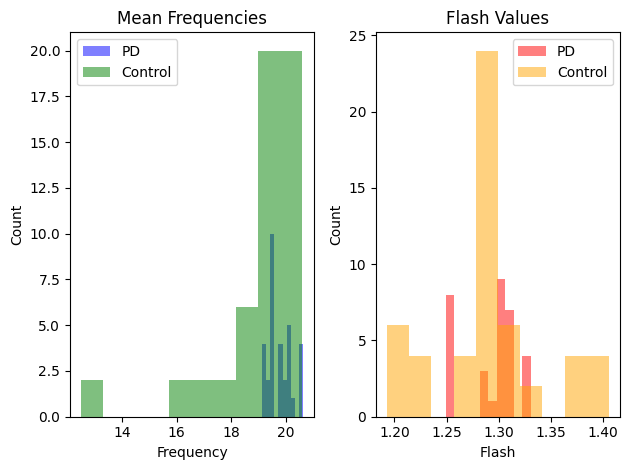

In [64]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(mean_freq_PD, alpha=0.5, label='PD', color='blue')
plt.hist(mean_freq_control, alpha=0.5, label='Control', color='green')
plt.title('Mean Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.legend()

# Plotting the flash values for PD and Control groups
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(mean_flash_PD, alpha=0.5, label='PD', color='red')
plt.hist(mean_flash_control, alpha=0.5, label='Control', color='orange')
plt.title('Flash Values')
plt.xlabel('Flash')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

It looks like these histograms are not so easy to be used for classification PD - control...

## Normalisation of the data
We use standard scaler for normalisation. In order to use train and validation sets, we need to first randomly assign patients between them, and then calculate sigma and mean values. 

### First make division into Train and Val patients
We randomly take 20 patients for train, and 8 for validation. Test ones we add later on.

In [6]:
indexex_control_PD = [4,6,3,0,2,7,1,5,15,8,11,13,14,16,9,10,12,25,20,23,27,26,24,18,22,21,17,19]
len(indexex_control_PD)
#They are 28 as expected, 8 control, 9&11 PD Left & Right11

28

In [7]:
train_patients = random.sample(indexex_control_PD, 20)
print(train_patients) # the rest are validation
val_patients = [x for x in indexex_control_PD if x not in train_patients]
print(val_patients)

[15, 2, 11, 7, 5, 4, 1, 24, 12, 17, 18, 25, 27, 21, 0, 20, 8, 22, 14, 10]
[6, 3, 13, 16, 9, 23, 26, 19]


In [10]:
folder_p = 'C:/Users/khokhlovam/Documents/kotelnikov/data/lstm_trials/n300_2FreqDurationPeriodsFlash_features_TRAIN/'   
dataset_not_norm = PDControlDataset_norm_ID(csv_file=folder_p +'PD_Control_300_2feat.csv', root_dir=folder_p, Ids_toUse = train_patients)
longXscale = np.zeros((2,300*len(dataloader)))
print(longXscale.shape)
i = 0
for sample in dataloader:
    #print(sample['data'].shape)
    # print(sample['data'].numpy()[0,:].shape)
    # print(sample['data'].numpy()[0,2,0:100])
    longXscale[:,i:(i+1)*300] = sample['data'].numpy()[0,:,:]

Before drop 86
After drop 62
(2, 25800)


In [59]:
# we now have all the fatures concateated, we can calculate mean and variance

In [11]:
s = StandardScaler()
# fit on training data
s.fit(np.transpose(longXscale,(1,0)))
# apply to training and test data
print(s.mean_,s.var_)

[0.20692636 0.0150875 ] [5.35306017 0.02277269]


### Apply standartisation for train, validation and test data! 

In [30]:
dataset_train = PDControlDataset_norm_ID(csv_file=folder_p +'PD_Control_300_2feat.csv', root_dir=folder_p, Ids_toUse = train_patients, scaler=s)
dataset_val = PDControlDataset_norm_ID(csv_file=folder_p +'PD_Control_300_2feat.csv', root_dir=folder_p, Ids_toUse = val_patients, scaler=s)
folder_t = 'C:/Users/khokhlovam/Documents/kotelnikov/data/lstm_trials/n300_2FreqDurationPeriodsFlash_features_TEST/'
dataset_test = PDControlDataset_norm_ID(csv_file=folder_t +'PDControl_2feat_300.csv', root_dir=folder_t, Ids_toUse = None, scaler=s)

Before drop 86
After drop 62
Before drop 86
After drop 24


#### Plot some histograms for Train, Val and Test data

First for train data

In [27]:
mean_freq_PD = []
mean_flash_PD = []
mean_freq_control = []
mean_flash_control = []
for i, sample in enumerate(dataset_train):
    label = sample['label']
    if label == 0:
        # print(sample['data'].shape)
        mean_freq_PD.append(sample['data'][0,:].mean())
        mean_flash_PD.append(sample['data'][1,:].mean())
    else:
        mean_freq_control.append(sample['data'][0,:].mean())
        mean_flash_control.append(sample['data'][1,:].mean())

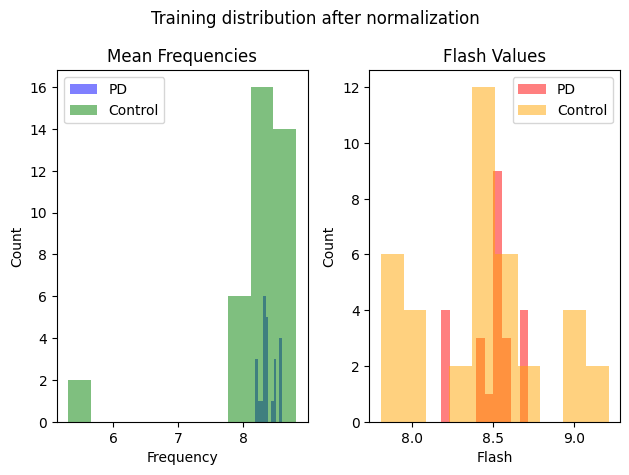

In [24]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(mean_freq_PD, alpha=0.5, label='PD', color='blue')
plt.hist(mean_freq_control, alpha=0.5, label='Control', color='green')
plt.title('Mean Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.legend()

# Plotting the flash values for PD and Control groups
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(mean_flash_PD, alpha=0.5, label='PD', color='red')
plt.hist(mean_flash_control, alpha=0.5, label='Control', color='orange')
plt.title('Flash Values')
plt.xlabel('Flash')
plt.ylabel('Count')
plt.legend()
plt.suptitle('Training distribution after normalization')
plt.tight_layout()
plt.show()

Then for test data

In [31]:
mean_freq_PD = []
mean_flash_PD = []
mean_freq_control = []
mean_flash_control = []
for i, sample in enumerate(dataset_test):
    label = sample['label']
    if label == 0:
        # print(sample['data'].shape)
        mean_freq_PD.append(sample['data'][0,:].mean())
        mean_flash_PD.append(sample['data'][1,:].mean())
    else:
        mean_freq_control.append(sample['data'][0,:].mean())
        mean_flash_control.append(sample['data'][1,:].mean())

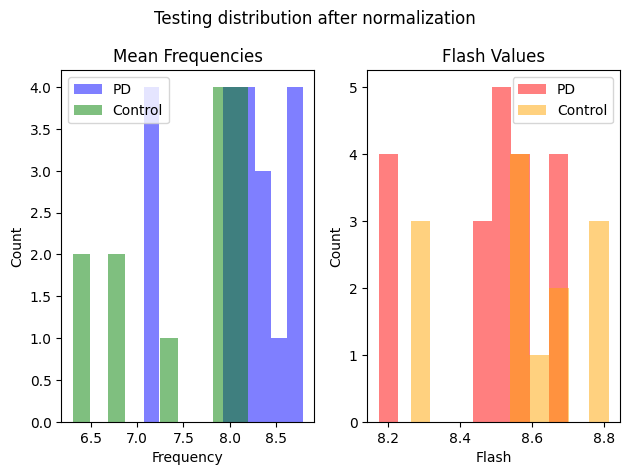

In [32]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(mean_freq_PD, alpha=0.5, label='PD', color='blue')
plt.hist(mean_freq_control, alpha=0.5, label='Control', color='green')
plt.title('Mean Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.legend()

# Plotting the flash values for PD and Control groups
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(mean_flash_PD, alpha=0.5, label='PD', color='red')
plt.hist(mean_flash_control, alpha=0.5, label='Control', color='orange')
plt.title('Flash Values')
plt.xlabel('Flash')
plt.ylabel('Count')
plt.legend()
plt.suptitle('Testing distribution after normalization')
plt.tight_layout()
plt.show()

## Model and training
Adding more parameters because with small number of parameters even overfitting doesn't work

In [36]:
class SimpleFCNet(nn.Module):
    def __init__(self, n_features=1, n_classes=1, n_timesteps=128):
        super().__init__()
        # Define the size of the input layer
        input_size = n_features * n_timesteps  # Total number of features for each sample

        # Single fully connected layer
        self.fc = nn.Linear(input_size, n_classes)  # Maps from the input directly to the output

        # Output layer activation
        self.lastlayer = nn.Sigmoid() if n_classes == 1 else nn.Softmax(dim=1)
        self.n_classes = n_classes

    def forward(self, x):
        # Flatten the input
        x = x.view(x.size(0), -1)  # Flatten each sample out into a single vector

        # Pass through the single fully connected layer
        x = self.fc(x)

        # Apply the output activation
        x = self.lastlayer(x)
        
        return x.squeeze() if n_classes == 1 else x
        # maybe fix: x.unsqueeze(-1)

In [44]:
# Parameters
n_features = 2 #
n_classes = 1
batch_size = 4
n_timesteps = 300
# Model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = SimpleFCNet(n_features = n_features, n_classes = n_classes, n_timesteps = n_timesteps)
# opt and loss
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
# Number of training epochs
num_epochs = 25
# data
dataloader = DataLoader(dataset_train, batch_size=batch_size,shuffle=True)  
val_dataloader = DataLoader(dataset_val, batch_size=batch_size,shuffle=False)  
test_dataloader = DataLoader(dataset_test, batch_size=1,shuffle=False) 

train_accuracy_epoch = np.zeros((num_epochs))
test_accuracy_epoch = np.zeros((num_epochs))
val_accuracy_epoch = np.zeros((num_epochs))
# 
for epoch in range(num_epochs):
    correct_predictions = 0
    total_predictions = 0
    total_loss = 0
    model.train()  # Set the model to training mode
    total_loss = 0.0
    for batch in dataloader:  # Use your data loader
        batch_data = batch['data'].float().to(device)
        # plt.imshow(batch['data'][0,:,:], interpolation='none')
        # plt.show()
        batch_labels = batch['label'].float().to(device)
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()        
        total_loss += loss.item()
        predicted_labels = (outputs > 0.5).float()  # Apply threshold
        # print(outputs.detach().numpy(),batch_labels)
        total_predictions += batch_labels.size(0)       
        correct_predictions += (predicted_labels == batch_labels).sum().item()
        

    # Calculate and print the average loss for this epoch
    average_loss = total_loss / len(dataloader)
    # Calculate accuracy
    accuracy = correct_predictions / total_predictions   
    print(f' Train Epoch [{epoch+1}/{num_epochs}] - Loss: {average_loss:.4f} - Accuracy: {accuracy:.4f}')
    train_accuracy_epoch[epoch]=accuracy

    # val stats
    val_loss = 0
    total_predictions = 0
    correct_predictions = 0
    with torch.no_grad():  # No need to track gradients during evaluation
        for batch in val_dataloader:
            batch_data = batch['data'].float().to(device)
            batch_labels = batch['label'].float().to(device)    
            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item()
            predicted_labels = (outputs > 0.5).float()  # Apply threshold
            total_predictions += batch_labels.size(0)       
            correct_predictions += (predicted_labels == batch_labels).sum().item()
    
        # Calculate and print the average loss and accuracy for the test data
        average_val_loss = val_loss / len(val_dataloader)
        val_accuracy = correct_predictions / total_predictions
        print(f'Val epoch Loss: {average_val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}')
    val_accuracy_epoch[epoch]=val_accuracy

    # test stats
    test_loss = 0
    total_predictions = 0
    correct_predictions = 0
    with torch.no_grad():  # No need to track gradients during evaluation
        for batch in test_dataloader:
            batch_data = batch['data'].float().to(device)
            batch_labels = batch['label'].float().to(device)    
            outputs = model(batch_data)
            outputs = torch.unsqueeze(outputs, dim=0)
            loss = criterion(outputs, batch_labels)
            test_loss += loss.item()
            predicted_labels = (outputs > 0.5).float()  # Apply threshold
            #print(predicted_labels)
            total_predictions += batch_labels.size(0)       
            correct_predictions += (predicted_labels == batch_labels).sum().item()


        # Calculate and print the average loss and accuracy for the test data
        average_test_loss = test_loss / len(test_dataloader)
        test_accuracy = correct_predictions / total_predictions
        print(f'Test epoch Loss: {average_test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}')
    test_accuracy_epoch[epoch]=test_accuracy


 Train Epoch [1/25] - Loss: 1.7117 - Accuracy: 0.5484
Val epoch Loss: 1.1956 - Val Accuracy: 0.5833
Test epoch Loss: 1.6125 - Test Accuracy: 0.4242
 Train Epoch [2/25] - Loss: 1.1448 - Accuracy: 0.5806
Val epoch Loss: 1.1487 - Val Accuracy: 0.5417
Test epoch Loss: 1.4886 - Test Accuracy: 0.4242
 Train Epoch [3/25] - Loss: 0.7315 - Accuracy: 0.6452
Val epoch Loss: 1.1515 - Val Accuracy: 0.5417
Test epoch Loss: 1.5749 - Test Accuracy: 0.3939
 Train Epoch [4/25] - Loss: 0.5605 - Accuracy: 0.6774
Val epoch Loss: 1.5170 - Val Accuracy: 0.4167
Test epoch Loss: 1.0908 - Test Accuracy: 0.6061
 Train Epoch [5/25] - Loss: 0.7840 - Accuracy: 0.7097
Val epoch Loss: 1.1849 - Val Accuracy: 0.5000
Test epoch Loss: 1.1418 - Test Accuracy: 0.4545
 Train Epoch [6/25] - Loss: 0.6359 - Accuracy: 0.7581
Val epoch Loss: 1.2585 - Val Accuracy: 0.5417
Test epoch Loss: 1.1032 - Test Accuracy: 0.5152
 Train Epoch [7/25] - Loss: 0.3832 - Accuracy: 0.8387
Val epoch Loss: 1.1851 - Val Accuracy: 0.5000
Test epoch L

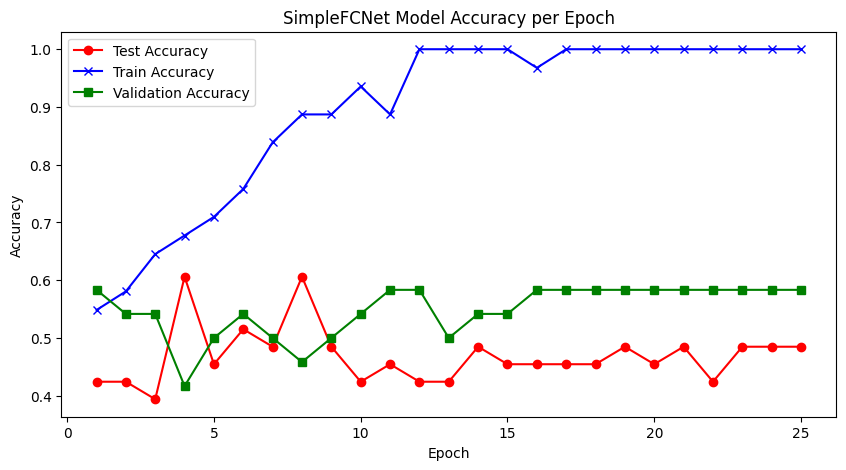

In [45]:

epochs = range(1, len(test_accuracy_epoch) + 1)

# Plot the accuracies for each epoch.
plt.figure(figsize=(10, 5))
plt.plot(epochs, test_accuracy_epoch, color='red', marker='o', label='Test Accuracy')
plt.plot(epochs, train_accuracy_epoch, color='blue', marker='x', label='Train Accuracy')
plt.plot(epochs, val_accuracy_epoch, color='green', marker='s', label='Validation Accuracy')

# Add title and labels to the plot.
plt.title('SimpleFCNet Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a legend to the plot.
plt.legend()

# Display the plot.
plt.show()

As a first step, let's create a dataset with out features, using the function defined previously.
Note that for each patient, we are getting different number of samples, from 1 to 3. It means that some patients have less wavetrains detected than others. 

# About these tests
We try to use a simple model, because we have very limited number of patients' data. 

Parkinson and control patiens are used, because when we evaluate the data visually, they seem to be the ones we can separate, based on mean frequency and DurationinPeriods. In the same moment, none of the characteristic separately allows for ideal data classification, as shown in previous tests. 

The experiments show that the model can succesfully learn to separate the PD from Control, however, there is a limitation in our trainiing and testing data - we do not specifically separate patients between train and test group, which can impact the results, because the model might just overfit and learn all the individual patients, assuming that the distribution of wavetrains in constant in time. 

In order to be sure that the model is really learning the dependencies between frequences and duration in periods, the next test will be on separated patients. 


## GhatGPT advice for regularisation
Predicting only one class for any data sample, often referred to as model collapse, can occur due to various reasons in neural network training, especially in binary classification tasks. Here are some strategies to diagnose and address this issue:

Data Imbalance: If your dataset is heavily imbalanced (i.e., one class is significantly more prevalent than the other), the model might learn to always predict the more common class. You can address this by:

Balancing the Dataset: Either by undersampling the majority class or oversampling the minority class.
Using Class Weights: Modify your loss function to give more weight to the minority class.
Learning Rate: If the learning rate is too high, the model might not learn effectively. Try reducing the learning rate.

Model Complexity: If the model is too simple, it might not be able to learn the complexity of the data. Conversely, if it's too complex, it might be overfitting to specific features of one class. Adjust the complexity of the model by adding/removing layers or changing the number of neurons.

Regularization Techniques: Regularization can help prevent overfitting. You can use techniques like dropout, L1/L2 regularization, or early stopping.

Loss Function: Since you are using binary cross-entropy loss, ensure that the output of your model is a single probability (which you've done with a sigmoid function). Check if the loss function is implemented correctly.

Activation Functions: Make sure that the activation functions used in the network are appropriate. ReLU in hidden layers is usually a good choice, but ensure the final layer uses a sigmoid function for binary classification.

Batch Normalization: Adding batch normalization layers after convolutional layers and before activation functions can sometimes improve performance by stabilizing the learning process.

Input Normalization: Ensure that your input data is properly normalized. This can have a significant impact on training dynamics.

Model Initialization: Sometimes, how the weights of the network are initialized can impact training. Experiment with different weight initialization methods.

Training Monitoring: Keep an eye on the loss and accuracy metrics during training. If the loss isn't decreasing, or if the accuracy isn't improving, it's a sign that the model isn't learning effectively.

Data Quality and Feature Engineering: Ensure that the data quality is good and consider feature engineering to make the task easier for the model.

Training Data Shuffle: Ensure that your training data is well shuffled before each epoch to prevent the model from learning any order-specific biases.

If the issue persists after trying these strategies, consider revisiting your data and model architecture. Sometimes, the model architecture might not be suitable for the type of data or problem at hand, requiring a more tailored approach.








## Table with results on INITIAL Dataset
### Single features, pre-filtered
| Features |normalization | number of repeats | Avg Train accuracy, std   |  Avg  Test accuracy,std  | comment | params
| -------- | --------------- | ----------------- | ------------------ |------------------------------- |--------------- | ---|
| Duration in periods | none   | 50 | 0.9817 (0.0732) | 0.4457 (0.1556) | only the ones corrsponding to frequences  [3, 10] | T=120 
| Duration in periods | StandardScaler |50 |0.9933 (0.0226) |  0.5029 (0.1647) | only the ones corrsponding to frequences  [3, 10] | T=120 
|Amplitude |  none | 10 | 0.58 (0.13) | 0.3514 (0.1544)| model is not trainable without normalization | T=120 
|Amplitude |  StandardScaler | 50|  9017 (0.0570)  |  0.7400 (0.1448)| only the ones corrsponding to frequences  [3, 10] | T=120


### Feature pairs
| Features |normalization | number of repeats | Avg Train accuracy, std   |  Avg  Test accuracy,std  | comment | params
| -------- | --------------- | ----------------- | ------------------ |------------------------------- |--------------- | ---|
| Duration in periods and frequencies | StandardScaler  | 10 | 0.9567(0.13)  | 0.95 (0.1033) |  random test train [90,26] | T=300
| Duration in periods and frequencies | StandardScaler  | 30 | 1.0000 (0.0000) |0.9962 (0.0168) |  random test train [90,26], add dropout 0.3 | T=300



## Table with results on test, train, validation Dataset
| Features |normalization | # repeats | train and val accuracy|  Test accuracy| train ID | val ID |test ID | params
| -------- | --------------- | ----------------- | ------------------ |------------------------------- |--------------- | ---|--| -----| 
| Duration in periods and frequencies | StandardScaler  | 1 |  1 and 0.8 |   0.45  |21, 25, 0, 7, 3, 9, 14, 1, 26, 15, 6, 17, 19, 5, 11, 8, 12, 23,27, 24 | 4, 2, 13, 16, 10, 20, 18, 22 | 41,42,43,44,45,46,47,48,49,50,51    | model with two conv |
| Duration in periods and frequencies | StandardScaler  | 1 |  1 & 1 | 0.39| 14, 8, 3, 7, 13, 12, 2, 25, 1, 20, 26, 15, 18, 0, 16, 19, 9, 11, 5, 24  |   | 41,42,43,44,45,46,47,48,49,50,51 | model with two conv|
| Duration in periods and frequencies | StandardScaler  | 1 |  1 & 1 | 0.46| 14, 8, 3, 7, 13, 12, 2, 25, 1, 20, 26, 15, 18, 0, 16, 19, 9, 11, 5, 24  |   | 41,42,43,44,45,46,47,48,49,50,51 | model with one conv simple FCNet|
| Duration in periods and frequencies | StandardScaler  | 1 |  1 & 0,82 | 0.6| 14, 8, 3, 7, 13, 12, 2, 25, 1, 20, 26, 15, 18, 0, 16, 19, 9, 11, 5, 24  |   | 41,42,43,44,45,46,47,48,49,50,51 |SimpleFCNet|

